In [30]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob
import warnings

warnings.filterwarnings("ignore")


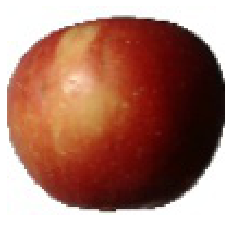

(100, 100, 3)
NumberOfClass:  131


In [31]:
train_path = "../fruits-360/Training/"
test_path = "../fruits-360/Test/"

img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

x = img_to_array(img)
print(x.shape)

className = glob(train_path + '/*' )
numberOfClass = len(className)
print("NumberOfClass: ",numberOfClass)


In [32]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

batch_size = 32

In [33]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [34]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 800 // batch_size,
        epochs=3,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)


Epoch 1/3
25/25 [==============================] - 111s 4s/step - loss: 4.7964 - accuracy: 0.0300 - val_loss: 4.7224 - val_accuracy: 0.0350
Epoch 2/3
25/25 [==============================] - 62s 2s/step - loss: 4.4422 - accuracy: 0.0525 - val_loss: 3.9879 - val_accuracy: 0.0938
Epoch 3/3
25/25 [==============================] - 60s 2s/step - loss: 3.9080 - accuracy: 0.0875 - val_loss: 4.0328 - val_accuracy: 0.1125


In [35]:
print(model.predict_classes(x_))
# model.save_weights("deneme.h5")

AttributeError: 'str' object has no attribute 'ndim'

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


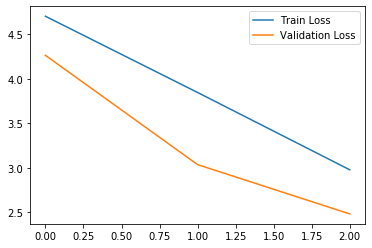

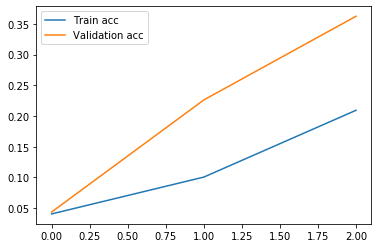

In [7]:
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

In [15]:
import json
with open("deneme.json","w") as f:
    json.dump(hist.history, f)
    


TypeError: Object of type float32 is not JSON serializable

In [17]:
#%% load history
import codecs
with codecs.open("deneme.json", "r",encoding = "utf-8") as s:
    h = json.loads(s.read())
plt.plot(h["loss"], label = "Train Loss")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"], label = "Train acc")
plt.plot(h["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()   

JSONDecodeError: Expecting value: line 1 column 236 (char 235)